Importing the Dependencies

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Data Collection & Processing

In [73]:
# load the data from csv file to Pandas DataFrame
df = pd.read_csv('tested.csv')

In [74]:
# printing the first 5 rows of the dataframe
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [75]:
# number of rows and Columns
df.shape

(418, 12)

In [ ]:
# getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [77]:
# check the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling the Missing values

In [78]:
# drop the missing values in "age" column from the dataframe
df.dropna(subset=['Age'],inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          245
Embarked         0
dtype: int64

In [79]:
# fill the missing values in "Fare" column with the median value
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [80]:
# Fill the missing values in "Age" column with median value
df['Age'] = df['Age'].fillna(df['Age'].median())

In [81]:
# Encode categorical features
df['Sex']= LabelEncoder().fit_transform(df['Sex'])
df['Embarked']= LabelEncoder().fit_transform(df['Embarked'])

Model Building

In [82]:
# Selcting the features and target variables
X= df.drop(columns= ['Survived','PassengerId','Name','Ticket','Cabin'])
y= df['Survived']

In [83]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [84]:
# Model training
model = LogisticRegression(max_iter= 150)
model.fit(X_train,y_train)

LogisticRegression(max_iter=150)

In [85]:
# Model Prediction
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2%}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual: Not Survived', 'Actual: Survived'],
                     columns=['Predicted: Not Survived', 'Predicted: Survived'])
print("\nConfusion Matrix:")
print(cm_df)

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df.round(2))

Model Accuracy: 100.00%

Confusion Matrix:
                      Predicted: Not Survived  Predicted: Survived
Actual: Not Survived                       44                    0
Actual: Survived                            0                   23

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     44.0
1                   1.0     1.0       1.0     23.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     67.0
weighted avg        1.0     1.0       1.0     67.0


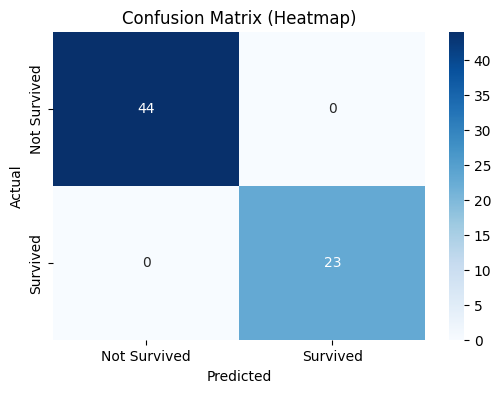

In [86]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Heatmap)')
plt.show()